In [42]:
import geopandas as gpd
import pandas as pd
import pathlib
import urllib

path_to_data = geopandas.datasets.get_path("naturalearth_lowres")
gdf = geopandas.read_file(path_to_data)

In [39]:
# https://n8henrie.com/uploads/2017/11/plotting-us-census-data-with-python-and-geopandas.html
states_filename = "tl_2017_us_state.zip"
states_url = f"https://www2.census.gov/geo/tiger/TIGER2017/STATE/{states_filename}"
states_file = pathlib.Path(states_filename)

zipcode_filename = "tl_2017_us_zcta510.zip"
zipcode_url = f"https://www2.census.gov/geo/tiger/TIGER2017/ZCTA5/{zipcode_filename}"
zipcode_file = pathlib.Path(zipcode_filename)

In [40]:
for data_file, url in zip([states_file, zipcode_file], [states_url, zipcode_url]):
    if not data_file.is_file():
        with urllib.request.urlopen(url) as resp, \
                open(data_file, "wb") as f:

            f.write(resp.read())

In [43]:
zipcode_gdf = gpd.read_file(f"zip://{zipcode_file}")
states_gdf = gpd.read_file(f"zip://{states_file}")

In [46]:
# states_gdf.head()
wa_gdf = states_gdf[states_gdf["NAME"] == 'Washington']
wa_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
19,4,9,53,01779804,53,WA,Washington,00,G4000,A,172111800165,12560067439,+47.4073238,-120.5757999,"POLYGON ((-123.24792 48.28456, -123.24779 48.2..."


In [52]:
zipcode_gdf.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63411475,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121783674,13437380,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9389362,999166,+41.6468445,-082.8226641,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48035540,0,+41.2673266,-083.4274645,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


In [54]:
zipcode_gdf['GEOID10'] = zipcode_gdf['GEOID10'].astype(int)
zipcode_wa = zipcode_gdf[(zipcode_gdf['GEOID10'] >= 98001) & (zipcode_gdf['GEOID10'] <= 99403)]

In [55]:
zipcode_wa.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
4836,98418,98418,B5,G6350,S,4359593,0,+47.2232292,-122.4465226,"POLYGON ((-122.46330 47.22201, -122.46327 47.2..."
4838,98421,98421,B5,G6350,S,17313287,4128434,+47.2606371,-122.4002088,"POLYGON ((-122.43773 47.26805, -122.43671 47.2..."
4839,98422,98422,B5,G6350,S,17258890,303027,+47.2903675,-122.3923947,"POLYGON ((-122.44403 47.30452, -122.44411 47.3..."
4840,98424,98424,B5,G6350,S,16334898,370223,+47.2328690,-122.3495756,"POLYGON ((-122.39963 47.24046, -122.39963 47.2..."
4841,98430,98430,B5,G6350,S,995568,256125,+47.1167180,-122.5687517,"POLYGON ((-122.58168 47.11234, -122.57915 47.1..."


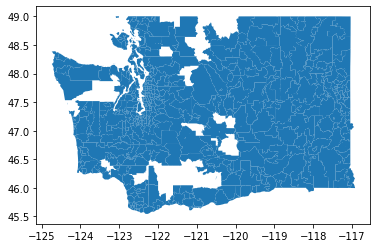

In [57]:
zipcode_wa.plot();

<AxesSubplot:>

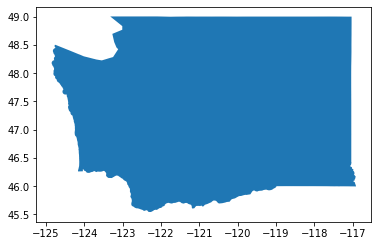

In [58]:
wa_gdf.plot()

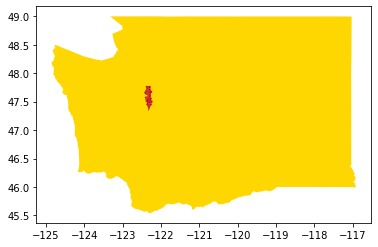

In [64]:
seattle_zipcodes = [98101,98102,98103,98104,98105,98106,98107,98108,98109,98111,98112,98113,98114,98115,98116,98117,98118,98119,98121,98122,98124,98125,98126,98127,98129,98131,98132,98133,98134,98136,98138,98139,98141,98144,98145,98146,98148,98151,98154,98155,98158,98160,98161,98164,98165,98166,98168,98170,98171,98174,98175,98177,98178,98181,98184,98185,98188,98190,98191,98194,98195,98198,98199]
seattle = zipcode_wa[zipcode_wa["GEOID10"].isin(seattle_zipcodes)]

base = wa_gdf.plot(color='#FFD700')
seattle.plot(ax=base, color='#BF0A30');